# Social Network Analysis for Startups

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

## 1) Introduction

**Social Network Analysis** - study of human relationships by means of graph theory  

Network data is everywhere -- you just need to learn to recopnize and analyse it. And once you do, new insights and ideas shall follow.  

network relationships can be:
* binary or valued
* symmetric or asymmetric
* bimodal or multimodal


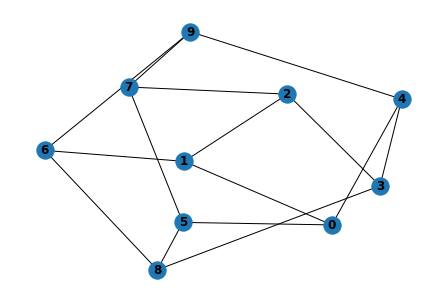

In [2]:
#pip install networkx
GP = nx.petersen_graph()
nx.draw(GP, with_labels=True, font_weight="bold")
plt.show()

## 2) Graph Theory -- A quick Introduction

**dyad** - denotes a single relationship, or an *edge* in traditional graph theory. basic unit of social network analysis. The *nouns*, or entities involved are often called the vertices or nodes. if a graph contains one type of node == 1-mode. can be bimodal or multimodal. The *semantics* decribes the nature (*verb*) of the relationship.  

frequency of communication maps pretty cleanly on the subjective "friendship" or "liking" scale.  

**density** - the ratio of non-zero connections to zero connections between all nodes in a network  

representing a network:  
* matrix with binary vals for connection
* edge-lists (sparse network): row for each connection. typically used for persistent storage.
* adjacency list: dict of dict key for each node with dict of connections typically used for internal use

**leaf node** - a node with only 1 incoming connection  
**child node** - a node connected to a starting, or **parent node**  
**sibling node** - child nodes of the same parent node  

In [3]:
import networkx.generators.small
g = networkx.generators.small.krackhardt_kite_graph()
print( g.number_of_edges() )
print( g.number_of_nodes() )
#print( g.adjacency_list() )
print( g.edges() )

18
10
[(0, 1), (0, 2), (0, 3), (0, 5), (1, 3), (1, 4), (1, 6), (2, 3), (2, 5), (3, 4), (3, 5), (3, 6), (4, 6), (5, 6), (5, 7), (6, 7), (7, 8), (8, 9)]


{0: [1, 2, 3, 5], 1: [0, 3, 4, 6], 2: [0, 3, 5], 3: [0, 1, 2, 4, 5, 6], 4: [1, 3, 6], 5: [0, 2, 3, 6, 7], 6: [1, 3, 4, 5, 7], 7: [5, 6, 8], 8: [7, 9], 9: [8]}


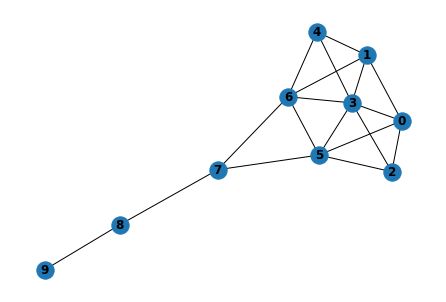

In [4]:
d = dict( ( x, list( g.neighbors(x) ) ) for x in g.nodes() )
print( d )
nx.draw(g, with_labels=True, font_weight="bold")
plt.show()

In [5]:
# docstring
#g?

In [6]:
# for traversal, we need to import the traversal module
from networkx.algorithms import traversal

<br>

### Depth-first Search

**Depth-first search** - an uninformed search that systematically traverses nodes until it finds a goal.  

    * start at some node, n
    * mark n as visited
    * for each neighbor of n that has not been visited:
        recursively apply DFS 
        
<br>        

In [7]:
# a list of nodes in order of visitation
def DFS_nodes( graph, node, visited=[] ):
    visited.append( node )
    for neighbor in graph[ node ]:
        if not neighbor in visited:
            DFS_nodes(graph, neighbor, visited)
    return visited

# a list of edges in the order they were traversed
def DFS_edges( graph, node, visited=[], edges=[] ):
    visited.append( node )
    for ni in graph[ node ]:
        if not ni in visited:
            edges.append( (node,ni) )
            DFS_edges(graph, ni, visited, edges)
    return edges

In [8]:
nodes = DFS_nodes( g, 0 )
print( nodes )
edges = DFS_edges( g, 0 )
print( edges )

[0, 1, 3, 2, 5, 6, 4, 7, 8, 9]
[(0, 1), (1, 3), (3, 2), (2, 5), (5, 6), (6, 4), (6, 7), (7, 8), (8, 9)]


In [9]:
g_DFS = nx.Graph()
g_DFS.add_edges_from( edges )

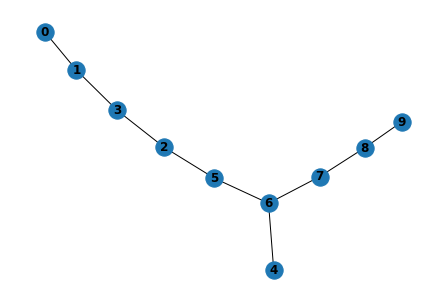

In [10]:
nx.draw(g_DFS, with_labels=True, font_weight="bold")
plt.show()

In [11]:
# implementing DFS with NetworkX
edges = traversal.dfs_edges( g )
print( list(edges) )

# print a successor dictionary
print( traversal.dfs_successors( g ) )

# print predecessors
print( traversal.dfs_predecessors( g ) )

# produce a directed graph representation of the traversal
tree = traversal.dfs_tree( g )
print( tree.succ )

[(0, 1), (1, 3), (3, 2), (2, 5), (5, 6), (6, 4), (6, 7), (7, 8), (8, 9)]
{0: [1], 1: [3], 3: [2], 2: [5], 5: [6], 6: [4, 7], 7: [8], 8: [9]}
{1: 0, 3: 1, 2: 3, 5: 2, 6: 5, 4: 6, 7: 6, 8: 7, 9: 8}
{0: {1: {}}, 1: {3: {}}, 2: {5: {}}, 3: {2: {}}, 4: {}, 5: {6: {}}, 6: {4: {}, 7: {}}, 7: {8: {}}, 8: {9: {}}, 9: {}}


<br>

### Breadth-first Traversal

**Breadth-first Traversal** - visits all of the immediate neighbors first and only then proceeds to neighbors  

    * start with node n
    * create queue Q
    * mark n as visited
    * add n to Q
    * while Q is not empty:
        * remove n from Q
        * for each neighbor that has not been visited:
            * mark as visited
            * add to Q
            
<br>

In [12]:
edges = traversal.bfs_edges( g, 0 )
print( list( edges ) )
tree = traversal.bfs_tree( g, 0 )
print( tree )

[(0, 1), (0, 2), (0, 3), (0, 5), (1, 4), (1, 6), (5, 7), (7, 8), (8, 9)]
DiGraph with 10 nodes and 9 edges


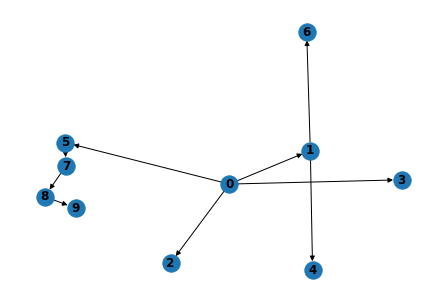

In [13]:
nx.draw(tree, with_labels=True, font_weight="bold")
plt.show()

<br>

### Paths and Walks 

* **walk** - an alternating sequence of nodes and the edges that connect them
    * open - start node != end node
    * closed - start node == end node
    * length - number of edges
* **path** - an open 'simple' walk where no node is crossed twice
    * **Cycle** - a closed simple walk
    
<br>

In [14]:
from networkx import algorithms
print( algorithms.shortest_path( g, 0, 5 ) )
print( algorithms.shortest_path( g, 0, 9 ) )
print( algorithms.average_shortest_path_length( g ) )

[0, 5]
[0, 5, 7, 8, 9]
1.9777777777777779


<br>

### Dijkstra's Algorithm

**Dijkstra's Algorithm** - for a given vertex, it finds the lowest cost path to all other vertices

### Graph Distance

**Graph Distance** - gives an indication of how information is likely to propagate  
**Shortest path** - the number of edges that one must walk over from A to B  
**Cost-based shortest path** - edges are weighted by some criteria (e.g. distance) to impose a cost. the optimal path has the lowest cost  
**Euclidean distance** - or Vector Similarity is the similarity of the nodes based on the adjacency matrix  

### Graph Diameter

**Graph Diameter** - largest number of vertices that must be traversed in order tot ravel from one vertex to another.

### Small World Networks

**Small World Networks** - keep a local neighborhood structure but allow a small number of ties to reach very far away. Dense communities or neighborhoods that are loosely connected by *boundary spanners*  

<br>

## 3) Centrality, Power, and Bottlenecks


**centrality measures** - point-measures of summary stats on a network

In [15]:
import urllib

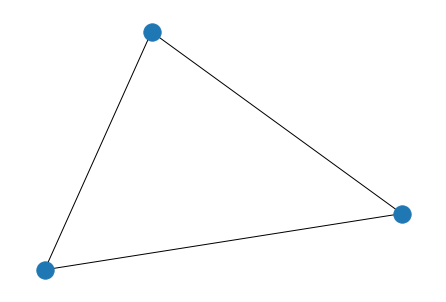

In [16]:
# getting oriented with NetworkX

g = nx.Graph()
g.add_edge( 'a', 'b' )
g.add_edge( 'b', 'c' )
g.add_edge( 'c', 'a' )
nx.draw( g )

In [17]:
print( g.nodes )
print( g.edges() )
print( g['a'] ) # return a dict of neighbors
print( g['a']['b'] ) # return attributes of an edge

['a', 'b', 'c']
[('a', 'b'), ('a', 'c'), ('b', 'c')]
{'b': {}, 'c': {}}
{}


In [18]:
target_url = 'http://www.livejournal.com/misc/fdata.bml?user=valerois'

data = urllib.request.urlopen( target_url ) # it's a file like object and works just like a file
for line in data: # files are iterable
    print( line )

b'# Note: Polite data miners cache on their end.  Impolite ones get banned.\n'
b'> bagira\n'
b'> angerona\n'
b'> yankel\n'
b'> yelya\n'
b'> ponka\n'
b'> marinka\n'
b'> saper\n'
b'> levinius\n'
b'> monella\n'
b'> irbisa\n'
b'> innaplanetyanka\n'
b'> hutshepsut\n'
b'> skyg74\n'
b'> samoleg\n'
b'> actr\n'
b'> gottfrid\n'
b'> krimsky\n'
b'> nelis\n'
b'> ptfenix\n'
b'> leprechaun\n'
b'> a_u\n'
b'> e_f\n'
b'> boctok\n'
b'> karial\n'
b'> wattson\n'
b'> baryshnia\n'
b'> ntl\n'
b'> salamandrina_\n'
b'> ant_fugue\n'
b'> levik\n'
b'> _milashka\n'
b'> oonabond\n'
b'> alinaf\n'
b'> vollalol\n'
b'> kitobow\n'
b'> petitmari\n'
b'> babushonok\n'
b'> koniglio\n'
b'> berryl\n'
b'> sylphida\n'
b'> graier\n'
b'> drunk_cherry\n'
b'> mamaracha\n'
b'> doc_a\n'
b'> 3eta\n'
b'> togranada\n'
b'> vorobeika\n'
b'> mel_ny\n'
b'> nicety\n'
b'> elka_palka\n'
b'> milady_winter\n'
b'> lengo\n'
b'> bengalia\n'
b'> stalic\n'
b'> asyatka\n'
b'> kpoxa_e\n'
b'> klaboo\n'
b'> azbukivedi\n'
b'> pavelrudnev\n'
b'> vorodis\n'


In [19]:
# function to fetch a list of friends

def read_lj_friends( g,name ):
    target_path = 'http://www.livejournal.com/misc/fdata.bml?user='
    response = urllib.request.urlopen( target_path + name )
    
    for line in response.readlines():
        line = str( line )[2:-3]
        #print( line )
        if line.startswith('#'):
            continue
        else:
            parts = line.split()
            if len( parts ) == 0:
                continue
            if parts[0] == '<':
                g.add_edge( parts[1], name )
            else:
                g.add_edge( name, parts[1] )

In [20]:
g = nx.Graph()
name = 'valerois'
read_lj_friends( g,name )

In [21]:
print( len(g) )

299


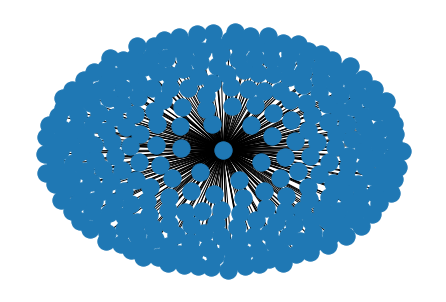

In [22]:
nx.draw(g)
plt.show()

<br>

### Snowball Sampling

a simple algorithm for collecting data  

**snowball sampling** or chain sampling or respondent-driven sampling. data provided by each respondent is used to recruit new respondents. a recursive routine similar to breadth-first search.  

    * start with a central node
    * obtain friends of the central node
    * for every friend:
        * sample friends of friends
        * for every friend of friend:
            sample friends of friends of friends
            ....
            
**Horizon of Observability** - a real limit of perception of social networks: we are pretty good of knowing who our friends are, but our knowledge drops off for friends of friends and even further for friends of friends of friends. Therefore, the ego has almost no insight into what is happening 3 or more steps away.  


In [23]:
# implement snowball sampling

def snowball_sampling( g, center, max_depth=2, current_depth=0, taboo_list=[] ):
    #print( center, current_depth, max_depth, taboo_list )
    if current_depth == max_depth:
        #print( 'out of depth' )
        return taboo_list
    if center in taboo_list:
        return taboo_list
    else:
        taboo_list.append( center )
    read_lj_friends( g, center )
    for node in g.neighbors( center ):
        taboo_list = snowball_sampling( g, node, 
                                       current_depth = current_depth + 1, 
                                       max_depth = max_depth, 
                                       taboo_list=taboo_list )
    return taboo_list

In [24]:
#g = nx.Graph()
#snowball_sampling( g, 'kozel_na_sakse' )

In [25]:
# save result
#nx.write_pajek( g, 'lj_friends.net' )

<br> 

### Centrality

**node degree** - number of connections a node has  

In [26]:
g = nx.read_pajek( 'lj_friends.net' )
len( g )

21514

In [27]:
# finding node dgree

deg = nx.degree( g )
degrees = [val for (node, val) in deg]
print( deg['valerois'] )
print( min( degrees ) )
print( max( degrees ) )

298
1
2662


In [28]:
# function to sort degree
def sorted_map( nodemap ):
    nodemap = list( nodemap )
    #print(nodemap)
    ms = sorted( nodemap, key=lambda i: i[1],reverse=True )
    return ms

ds = sorted_map( deg )

# retrun the top 10 people in the list
ds[0:9]

[('zina_korzina', 2662),
 ('periskop', 2579),
 ('usolt', 2566),
 ('letchikleha', 2553),
 ('kirulya', 2404),
 ('guy_gomel', 2350),
 ('jolita', 2254),
 ('ptfenix', 1561),
 ('orteme_ru', 814)]

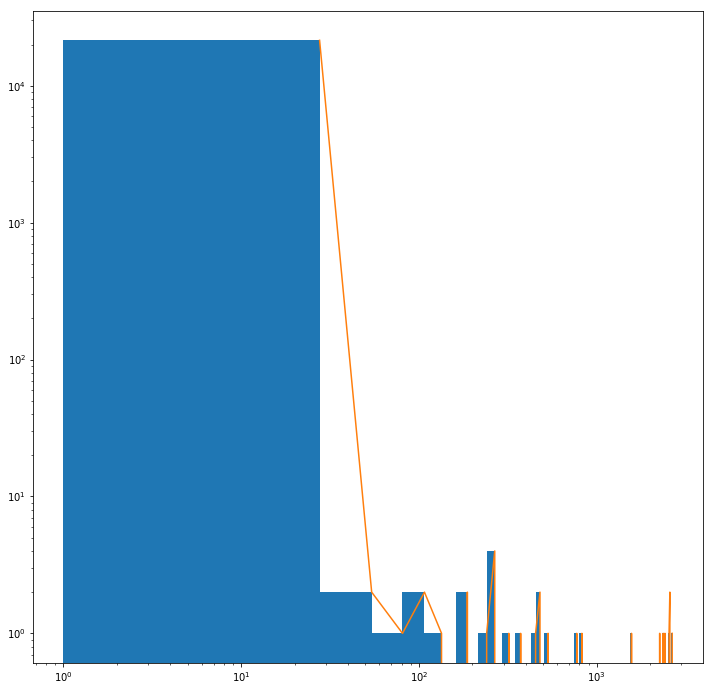

In [29]:
# plot the distribution of node degree
fig=plt.figure(figsize=(12, 12))
h = plt.hist( degrees, 100 )
plt.loglog( h[1][1:], h[0] )
plt.show()

In [32]:
# return a new graph object that contains th enetwork wtih pendant and isolated nodes removed

def trim_degrees( g, degree=1 ):
    d = nx.degree( g )
    dlist = list( nx.degree( g ) )
    #print( dlist )
    g2 = {}
    for n in g.nodes():
        #print(n)
        if d[n] > degree:
            #print( d[n])
            g2[n]=d[n]
    return g2

In [33]:
core = trim_degrees( g, degree=1 )
len( core )

2755

In [34]:
core = trim_degrees( g, degree=2 )
len( core )

706

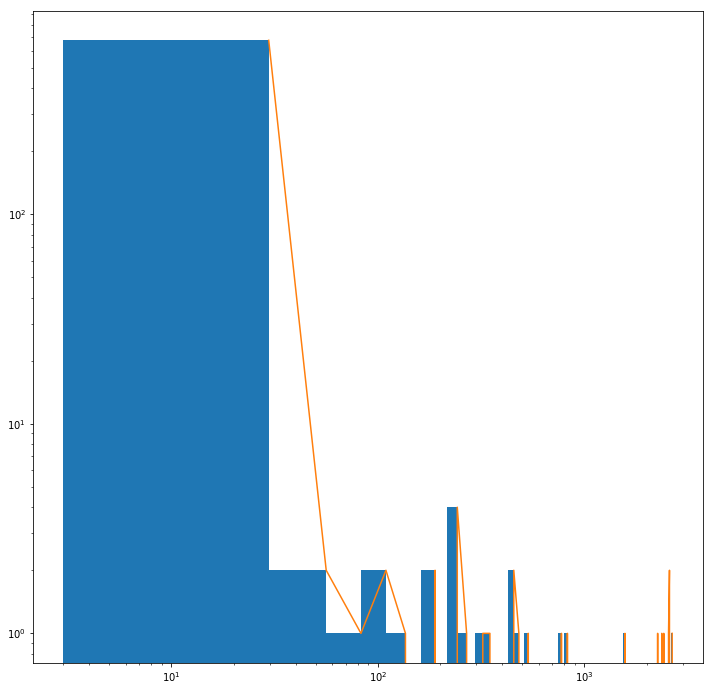

In [35]:
fig=plt.figure(figsize=(12, 12))
degrees = core.values()
h = plt.hist( degrees, 100 )
plt.loglog( h[1][1:], h[0] )
plt.show()

<br>

### Closeness Centrality

distance to others can define a node's role in a network.  
compute the closeness centrality by:  
1. compute the shortest path between every pair of nodes (Diskstra's algorithm)
2. for every node:
    1. compute the average distance to all other nodes
    2. divide by the maximum distance
    3. closeness = 1/average distance
    
<br>

In [36]:
c = nx.closeness_centrality( g )

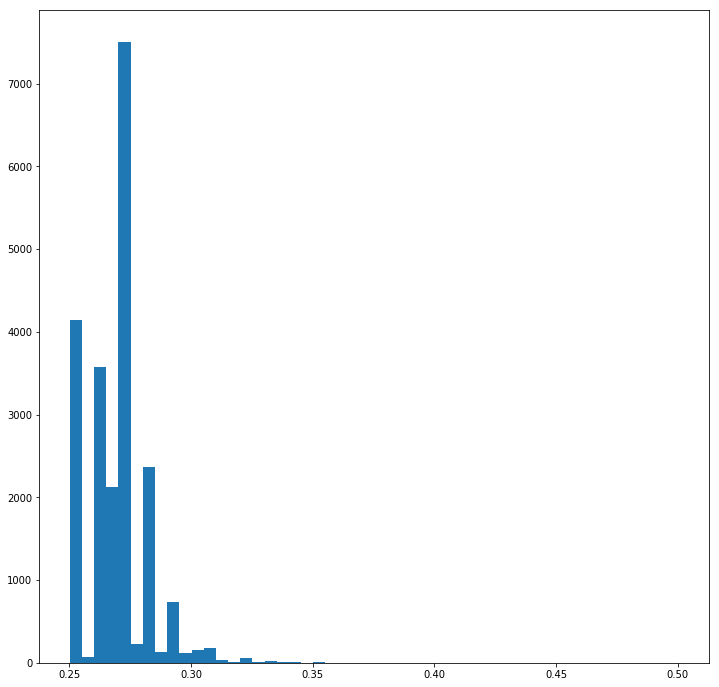

In [37]:
clist = list(c)
cvals = [c[name] for name in clist]
fig=plt.figure(figsize=(12, 12))
plt.hist( cvals, 50 )
plt.show()

<br>

### Betweenness Centrality

**betweennes Centrality** - identify *boundary spanners*, or nodes that bridge between two of more communities that otherwise would not communicate with each other

    * compute the shortest paths between every pair of nodes using Dijkstra's algorithm
    * for every node I in the network:
        * count the number of shortest paths that I is on
    * normalize the numbers to bring your results to the 0-1 range

In [38]:
G2 = nx.DiGraph(g)
b = nx.betweenness_centrality( G2 )

KeyboardInterrupt: 

<br>

|   **Metric**   |            **Low Degree**           |             **Low Closeness**            | **Low Betweenness**                               |
|:--------------:|:-----------------------------------:|:----------------------------------------:|---------------------------------------------------|
|   High Degree  |                                     | Ego embedded in cluster far from network | Ego's connections are redundant                   |
| High Closeness | Key player tied to  important nodes |                                          | Ego's in a dense, active cluster close to network |

<br>

In [ ]:
#nx.eigenvector_centrality( g )
eigen_centrality = nx.eigenvector_centrality(G2, max_iter=1000)

In [ ]:
eigen_centrality

<br>

### Eigenvector Centrality

Finding *Eminence grise*  
**eigenvector centrality** is a recursive version of degree centrality that weights each link by the degree of the node at the other end of the link.  

     * assign a centrality score of 1 to all nodes
     * recompute the scores of each node as a weighted sum of the centralities of all nodes in a node's neighborhood
     * normalize by dividing each value by the largest value
     * repeat steps 2 and 3 until the values stop changing
     
**Note**: Eigenvector centrality is O(nodes x average_degree) and therefore not realistic to compute on very large networks
     
<br>

### Klout score

**Klout Score** - weigh all of its users on a percentage scale

<br>

### PageRank

**PageRank Centrality** - determined through incoming links. represents the likelihood that a person following links will arrive at a particular page  
also known as an **anytime algorithm** - at any given timeit will give a result, but if more time is given, the quality of the results improves

In [ ]:
pr = nx.pagerank( G2 )

<br>

## 4) Cliques, Clusters and Components

<br>

**subgraph** - a subset of interconnected nodes.  
**component subgraphs** - portions of the network that are disconnected from each other.  

In [54]:
e = nx.read_pajek('egypt_retweets.net')
print( len( e ) )

25178


In [40]:
subg = (list(e.subgraph(c) for c in nx.connected_components( e )))
len( subg )

3122

(array([3.121e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([1.00000e+00, 1.77710e+03, 3.55320e+03, 5.32930e+03, 7.10540e+03,
        8.88150e+03, 1.06576e+04, 1.24337e+04, 1.42098e+04, 1.59859e+04,
        1.77620e+04]),
 <a list of 10 Patch objects>)

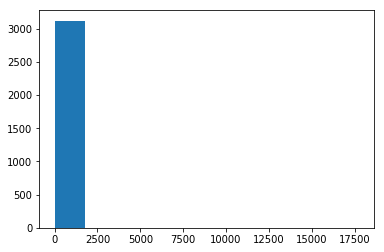

In [41]:
subgvals = [ len(c) for c in nx.connected_components( e ) ]
plt.hist( subgvals )

(array([7., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([1.10000e+01, 1.78610e+03, 3.56120e+03, 5.33630e+03, 7.11140e+03,
        8.88650e+03, 1.06616e+04, 1.24367e+04, 1.42118e+04, 1.59869e+04,
        1.77620e+04]),
 <a list of 10 Patch objects>)

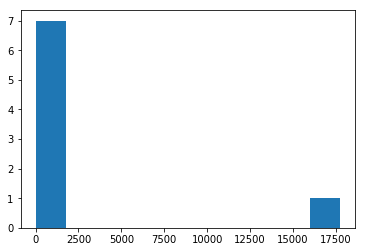

In [42]:
subgvals = [ len(c) for c in nx.connected_components( e ) if len(c) > 10 ]
plt.hist( subgvals )

<br>

### The Island Method

**island method** - apply a threshold to allow nodes above a certain value through. iterate by raising the threshold until smaller components (subcores) become apparent.  

<br>

In [11]:
def trim_edges( g, weight = 1 ):
    g2 = nx.Graph()
    for f, to, edata in g.edges( data=True ):
        if edata['weight'] > weight:
            #print( edata['weight'] )
            g2.add_edge( f, to )
    return g2

def island_method( g, iterations = 5 ):
    weights = [ edata['weight'] for f, to, edata in g.edges( data=True ) ]
    mn = int( min( weights ) )
    mx = int( max( weights ) )
    step = int( (mx-mn)/iterations )
    return [ [threshold, trim_edges(g, threshold)] for threshold in range(mn, mx, step) ]

In [44]:
cc = (list(e.subgraph(c) for c in nx.connected_components( e )))
islands = island_method( cc[0] )
for i in islands:
    ccc = (list(i[1].subgraph(c) for c in nx.connected_components( i[1] )))
    print(i[0], len(i[1]), len(ccc))

1 12360 314
62 27 11
123 8 3
184 5 2
245 5 2


<br>

**How to read?** - when all links of a single value (retweets) are dropped, the network separates into 314 island subgraphs.

<br>

### Subgraphs - Ego Networks

**ego networks** - subnetworks that are centered on a certain node. shallow breadth of search subgraphs  

**clustering coefficient** - measures the proportion of your friends that are also friends with each other  

<br>

In [45]:
ego = nx.ego_graph( e, 'justinbieber' )

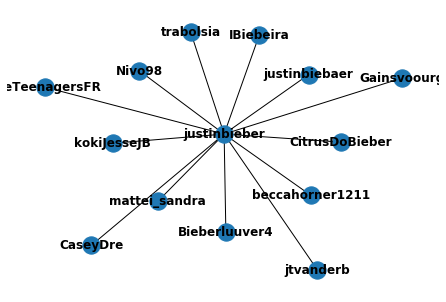

In [46]:
nx.draw(ego, with_labels=True, font_weight="bold")
plt.show()

In [55]:
for name in ego:
    print( name )

justinbiebaer
Bieberluuver4
Gainsvoourg
CaseyDre
mattei_sandra
CitrusDoBieber
TheTeenagersFR
jtvanderb
beccahorner1211
IBiebeira
kokiJesseJB
trabolsia
justinbieber
Nivo98


In [49]:
print( len( ego ) )
bieb = nx.Graph( ego )
print( nx.average_clustering( bieb ) )

14
0.0


In [56]:
ego2 = nx.ego_graph( e, 'Ghonim' )
ghonim = nx.Graph( ego2 )
print( len( ghonim ) )
print( nx.average_clustering( ghonim ) )

730
0.22613518489812284


<br>

### Triads

**triads** - three nodes interconnected in some way.

In [64]:
columns=["node1", "node2", "weight","conf"]
df = pd.read_csv( '9_11_edgelist.csv', header = None )
df.columns = columns
df.head()

,node1,node2,weight,conf
0,Hani Hanjour,Majed Moqed,5,1
1,Hani Hanjour,Nawaf Alhazmi,5,1
2,Hani Hanjour,Khalid Al-Mihdhar,5,1
3,Hani Hanjour,Lotfi Raissi,5,1
4,Hani Hanjour,Bandar Alhazmi,5,1


In [75]:
g = nx.Graph()
for index, row in df.iterrows():
    g.add_edge( row['node1'], row['node2'] )

In [74]:
g['Hani Hanjour']

AtlasView({'Majed Moqed': {}, 'Nawaf Alhazmi': {}, 'Khalid Al-Mihdhar': {}, 'Lotfi Raissi': {}, 'Bandar Alhazmi': {}, 'Rayed Mohammed Abdullah': {}, 'Salem Alhazmi': {}, 'Mohamed Atta': {}, 'Abdul Aziz Al-Omari': {}, 'Ahmed Alghamdi': {}, 'Faisal Al Salmi': {}, 'Marwan Al-Shehhi': {}, 'Ziad Jarrah': {}})

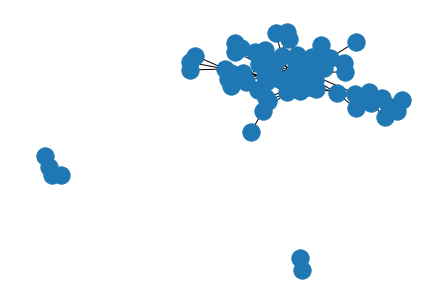

In [78]:
nx.draw(g)
plt.show()

<br>

### Analyzing Triads in Real Networks

AttributeError: 'DiGraph' object has no attribute 'node'

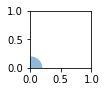

In [3]:
import triadic
import draw_triads

<br>

### Cliques

**cliques** - a cohesive group of people that are tightly connected to each other. a maximal complete subgraph of a given graph. a group of nodes that are directly connected to every node in the clique

<br>

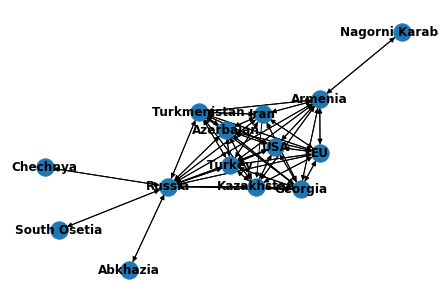

In [8]:
eco=nx.read_pajek( "economic.net" )
nx.draw( eco, with_labels=True, font_weight="bold" )

In [13]:
# drop the low-level connections
e2 = trim_edges( eco, weight=0.5 )
e2
cliques = list( nx.find_cliques( e2 ) )
cliques

[['Abkhazia', 'Russia'],
 ['Chechnya', 'Russia'],
 ['EU', 'Turkey', 'USA'],
 ['EU', 'Turkey', 'Russia'],
 ['EU', 'Georgia'],
 ['EU', 'Armenia'],
 ['EU', 'Azerbajan'],
 ['EU', 'Kazakhstan', 'USA'],
 ['EU', 'Kazakhstan', 'Russia'],
 ['Nagorni Karabakh', 'Armenia'],
 ['South Osetia', 'Russia']]

<br>

### Hierarchical Clustering

    * starting at the lowest level, every node is assigned its own cluster
    * Use distance to find the closest pair s of nodes and cluster
    * recompute the distance table treating the newly merged cluster as a node
        * single link - smallest minimum pairwise distance
        * average link - smallest average pairwise distance
        * maximum link - smallest maximum pairwise distance
    * repeat the process until all clusters are connected
    
### Block Models

**block model** - a simplified network derived from the original network where all nodes in a cluster are considered a single node and all relationships between original nodes become aggregated into relationships between blocks